In [193]:
import pandas as pd
from colors import colors
from matplotlib import pyplot as plt
import math
import numpy as np

In [194]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

In [195]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y * np.log(y1) + (1 - y) * np.log(1 - y1))

In [196]:
# drops all non-numeric columns but "Hogwarts House"
def arrange_columns(df):
    # drop index column
    df.drop(columns=['Index'], inplace=True)
    for column in df:
        if df[column].dtype.kind in 'biufc': # https://stackoverflow.com/a/38185438
            continue
        if column == 'Hogwarts House':
            continue
        else:
            df.drop(columns=[column], inplace=True)

In [197]:
# adds newlines to long label names
def adjust_plot_labels(df):
    new_column_names = []
    for column in df:
        if column == 'Hogwarts House':
            new_column_names.append(column)
        elif len(column) > 15:
            split_col = column.split(" ")
            tmp_col_name = ""
            for i in range(len(split_col)):
                tmp_col_name += split_col[i]
                if i % 2:
                    tmp_col_name += "\n"
                else:
                    tmp_col_name += " "
            new_column_names.append(tmp_col_name)
        else:
            new_column_names.append(column)
    df.columns = new_column_names

In [198]:
# CHANGE THIS TO MY GRADIENT DESCENT
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    #cost = [[] for i in range(10)]
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*X.iloc[:, k])
            theta = pd.DataFrame(theta)
            #c =cost(X, y.iloc[:, j], theta.iloc[:,j])
            #cost[j].append(c)
    return theta  

In [199]:
# Read dataset and preprocess it
try:
    df = pd.read_csv("datasets/dataset_train.csv")
except:
    print(f"{colors().RED}Error: could not read file{colors().END}")
    exit()
arrange_columns(df)
adjust_plot_labels(df)

In [200]:
# Normalize data
for column in df:
    if df[column].dtype.kind not in 'biufc': # https://stackoverflow.com/a/38185438
        continue
    max_norm = df[column].max()
    min_norm = df[column].min()

    for i in range(len(df)):
        df.iloc[i, df.columns.get_loc(column)] = (df.iloc[i, df.columns.get_loc(column)] - min_norm) / (max_norm - min_norm)
        # make missing data zero
        if math.isnan(df.iloc[i, df.columns.get_loc(column)]) == True:
            #print(df.iloc[i, df.columns.get_loc(column)])
            df.iloc[i, df.columns.get_loc(column)] = 0
            #print(df.iloc[i, df.columns.get_loc(column)])

In [201]:
#plt.scatter(df.Flying, df["Hogwarts House"])

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
#split in input and output variables
df_without_house = df.drop(columns=["Hogwarts House"])
df_only_house = df["Hogwarts House"]

In [204]:
df_without_house

,Arithmancy,Astronomy,Herbology,Defense Against\nthe Dark\nArts,Divination,Muggle Studies,Ancient Runes,History of\nMagic,Transfiguration,Potions,Care of\nMagical Creatures\n,Charms,Flying
0,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649
1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696
2,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090
3,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700
4,0.653604,0.707791,0.112971,0.000000,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.567396,0.666189,0.262629,0.333811,0.769177,0.270442,0.724445,0.174819,0.299445,0.443483,0.418148,0.299121,0.797542
1596,0.677868,0.672871,0.746591,0.327129,0.558878,0.203419,0.350918,0.534834,0.777411,0.577087,0.467757,0.410483,0.491315
1597,0.682577,0.761874,0.323727,0.238126,0.788528,0.321883,0.761260,0.138550,0.245615,0.351388,0.531417,0.264231,0.824988
1598,0.828008,0.716314,0.627083,0.283686,0.824404,0.116920,0.215752,0.610742,0.942760,0.471727,0.436688,0.417122,0.227255


In [205]:
# House belonging matrix (get's filled with '1' for corresponding house)
y1 = np.zeros([df_without_house.shape[0], len(df_only_house.unique())])
y1 = pd.DataFrame(y1)
y1

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1595,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0


In [206]:
for i in range(0, len(df_only_house.unique())):
    for j in range(0, len(y1)):
        if df_only_house[j] == df_only_house.unique()[i]:
            y1.iloc[j, i] = 1
        else:
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [207]:
y1.tail()

,0,1,2,3
1595,0.0,0.0,1.0,0.0
1596,0.0,1.0,0.0,0.0
1597,0.0,0.0,1.0,0.0
1598,0.0,0.0,0.0,1.0
1599,0.0,0.0,0.0,1.0


In [208]:
y1.shape

(1600, 4)

In [209]:
# why 15?? -> 13 courses + bias + index?
theta = np.zeros([df_without_house.shape[1]+1, y1.shape[1]])
theta.shape
# here 14

(14, 4)

In [210]:
#add a bias column
X = pd.concat([pd.Series(1, index=df_without_house.index, name='bias'), df_without_house], axis=1)
X.shape

(1600, 14)

In [211]:
# theta array, all filled with '1'
theta = np.ones(df_without_house.shape[1]+1)
theta.shape
# here 15, why???

(14,)

In [212]:
h = hypothesis(theta, X)
h

array([0.99985635, 0.99854442, 0.99993251, ..., 0.99927891, 0.99955555,
       0.999556  ])

In [213]:
theta = pd.DataFrame(theta)
type(theta.iloc[:,0])

pandas.core.series.Series

In [214]:
# WHAT IS BIG X????
theta = np.zeros([df_without_house.shape[1]+1, y1.shape[1]])
theta = gradient_descent(X, y1, theta, 0.02, 1500)
theta

IndexError: single positional indexer is out-of-bounds

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_without_house, df_only_house, test_size=0.15)

In [15]:
X_train

,Arithmancy,Astronomy,Herbology,Defense Against\nthe Dark\nArts,Divination,Muggle Studies,Ancient Runes,History of\nMagic,Transfiguration,Potions,Care of\nMagical Creatures\n,Charms,Flying
1237,0.580726,0.755638,0.392752,0.244362,0.921584,0.386145,0.807778,0.180710,0.401019,0.463093,0.450804,0.409569,0.803101
1154,0.511885,0.704180,0.201753,0.295820,0.709153,0.166130,0.581466,0.165609,0.171182,0.331072,0.397156,0.190241,0.814414
1050,0.594877,0.264307,0.285048,0.735693,0.198305,0.000000,0.242638,0.686207,0.727721,0.777309,0.520018,0.302623,0.257393
862,0.472612,0.758128,0.335379,0.241872,0.880431,0.325310,0.716057,0.186684,0.330795,0.439444,0.648700,0.361088,0.821840
449,0.685562,0.698216,0.213851,0.301784,0.680687,0.255743,0.672754,0.166889,0.186991,0.334828,0.420604,0.181803,0.774352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0.431909,0.765317,0.243591,0.234683,0.785010,0.428247,0.710535,0.246146,0.289204,0.520391,0.576763,0.314746,0.786598
595,0.488633,0.197845,0.901753,0.802155,0.725199,0.620092,0.628463,0.611396,0.659269,0.482651,0.324978,0.910887,0.520867
691,0.408920,0.230309,0.634838,0.769691,0.738526,0.779365,0.713626,0.726507,0.885565,0.881477,0.633737,0.900565,0.359057
1183,0.816889,0.320831,0.178051,0.679169,0.000000,0.285215,0.186853,0.506674,0.881737,0.704364,0.496804,0.086764,0.182395


In [16]:
y_train

1237    Gryffindor
1154    Gryffindor
1050     Slytherin
862     Gryffindor
449     Gryffindor
           ...    
1492    Gryffindor
595      Ravenclaw
691      Ravenclaw
1183     Slytherin
1265     Ravenclaw
Name: Hogwarts House, Length: 1360, dtype: object

In [17]:
y_test

1316    Hufflepuff
1090     Ravenclaw
703      Ravenclaw
403     Hufflepuff
1164     Ravenclaw
           ...    
277     Hufflepuff
685      Slytherin
1190     Slytherin
1455    Hufflepuff
1272     Slytherin
Name: Hogwarts House, Length: 240, dtype: object

In [305]:
from sklearn.linear_model import LogisticRegression

In [322]:
model = LogisticRegression(multi_class="multinomial")

In [323]:
model.fit(X_train.values, y_train.values)

LogisticRegression(multi_class='multinomial')

In [324]:
model.predict(X_test.values)


array(['Slytherin', 'Ravenclaw', 'Hufflepuff', 'Slytherin', 'Hufflepuff',
       'Slytherin', 'Hufflepuff', 'Hufflepuff', 'Gryffindor',
       'Gryffindor', 'Hufflepuff', 'Gryffindor', 'Slytherin',
       'Gryffindor', 'Hufflepuff', 'Slytherin', 'Gryffindor', 'Ravenclaw',
       'Slytherin', 'Slytherin', 'Slytherin', 'Ravenclaw', 'Gryffindor',
       'Slytherin', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Gryffindor',
       'Hufflepuff', 'Gryffindor', 'Hufflepuff', 'Slytherin',
       'Hufflepuff', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff',
       'Hufflepuff', 'Gryffindor', 'Slytherin', 'Hufflepuff',
       'Hufflepuff', 'Slytherin', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff',
       'Hufflepuff', 'Gryffindor', 'Ravenclaw', 'Ravenclaw', 'Ravenclaw',
       'Hufflepuff', 'Hufflepuff', 'Slytherin', 'Slytherin', 'Ravenclaw',
       'Hufflepuff', 'Gryffindor', 'Slytherin', 'Gryffindor',
       'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff',
       'Hufflepuff', 'Slytherin', 'Gryffindor

In [325]:
model.score(X_test.values, y_test.values)

0.9833333333333333

In [326]:
df["Hogwarts House"][23]

'Hufflepuff'

In [327]:
df.iloc[23]

Hogwarts House                      Hufflepuff
Arithmancy                            0.536296
Astronomy                             0.827003
Herbology                             0.475941
Defense Against\nthe Dark\nArts       0.172997
Divination                            0.967429
Muggle Studies                        0.172933
Ancient Runes                         0.385735
History of\nMagic                     0.452598
Transfiguration                       0.868076
Potions                               0.605647
Care of\nMagical Creatures\n          0.794548
Charms                                 0.42723
Flying                                0.444978
Name: 23, dtype: object

In [328]:
model.predict([df_without_house.iloc[23]])

array(['Hufflepuff'], dtype=object)

In [329]:
# get confusion matrix
y_predicted = model.predict(X_test.values)

huffle = 0
slyth = 0
gryf = 0
rav = 0
for i in range(len(y_predicted)):
    if y_predicted[i] == "Hufflepuff":
        huffle+=1
    elif y_predicted[i] == "Slytherin":
        slyth+=1
    elif y_predicted[i] == "Gryffindor":
        gryf+=1
    elif y_predicted[i] == "Ravenclaw":
        rav+=1
print(huffle, slyth, gryf, rav)
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

86 47 51 56


array([[51,  0,  2,  0],
       [ 0, 85,  0,  0],
       [ 0,  0, 53,  0],
       [ 0,  1,  1, 47]])

Text(95.72222222222221, 0.5, 'Truth')

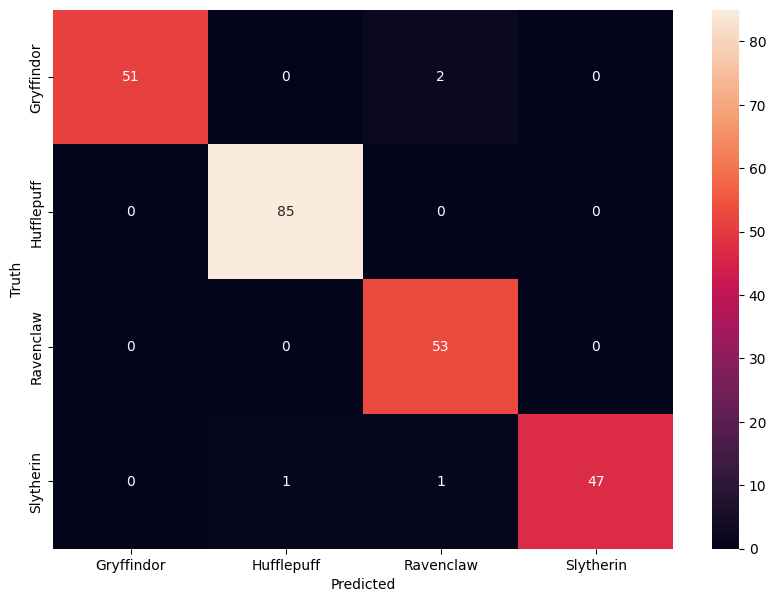

In [330]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, xticklabels=["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"], yticklabels=["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"])
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [332]:
model.score(X_test.values, y_test.values)

0.9833333333333333